# 제3장 단순회귀 모형의 추정

추정(estimation)
    - 모수에 대응하는 숫자를 표본으로부터 구하는 것
추정량(estimator)
    - "자료가 주어지면 이러저러한 방식으로 숫자를 구하겠다"고 하는 공식
추정값(estimate)
    - 추정량을 실제 자료에 적용하여 구한 값

## 3.1 자료

### 3.1.1 소득과 환경오염

In [2]:
url = "http://econ.korea.ac.kr/~chirokhan/book/data/co2gdp2005.csv"
ekc = read.csv(url)

In [3]:
datadir = "http://econ.korea.ac.kr/~chirokhan/book/data/"
ekc = read.csv(file.path(datadir, "co2gdp2005.csv"))

In [4]:
names(ekc)

[1] "ccode"    "cname"    "gdppcppp" "co2pc"

In [5]:
nrow(ekc)

[1] 183

In [6]:
head(ekc)

,ccode,cname,gdppcppp,co2pc
,<fct>,<fct>,<dbl>,<dbl>
1,AFG,Afghanistan,1039.408,0.05485483
2,ALB,Albania,6199.928,1.41249821
3,ARE,United Arab Emirates,84338.359,25.91458723
4,ARM,Armenia,4716.243,1.44373096
5,ATG,Antigua and Barbuda,19067.068,4.97431115
6,AUS,Australia,32559.459,17.17438627


In [7]:
summary(ekc)

     ccode                     cname        gdppcppp            co2pc         
 AFG    :  1   Afghanistan        :  1   Min.   :   476.7   Min.   : 0.01941  
 ALB    :  1   Albania            :  1   1st Qu.:  2519.9   1st Qu.: 0.61732  
 ARE    :  1   Algeria            :  1   Median :  7771.4   Median : 2.17747  
 ARM    :  1   Antigua and Barbuda:  1   Mean   : 13962.3   Mean   : 4.69970  
 ATG    :  1   Armenia            :  1   3rd Qu.: 18034.8   3rd Qu.: 6.89611  
 AUS    :  1   Australia          :  1   Max.   :102253.1   Max.   :61.98976  
 (Other):177   (Other)            :177                                        

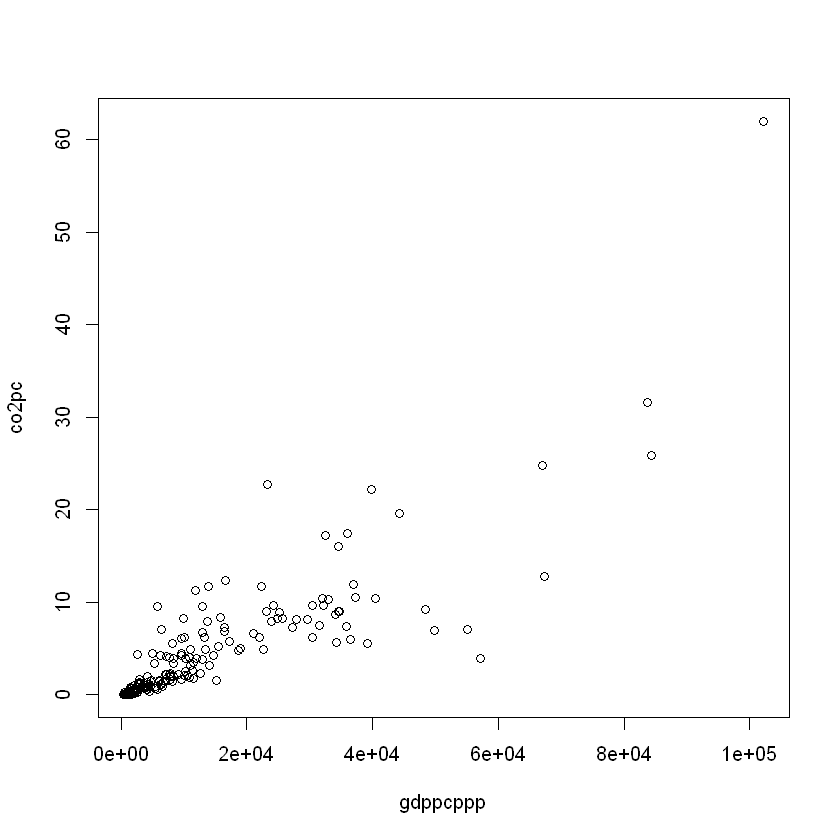

In [8]:
plot(co2pc~gdppcppp, data=ekc)

### 3.1.2 우리나라 군별 공무원수와 재정자립도

In [9]:
datadir = "http://econ.korea.ac.kr/~chirokhan/book/data"
serv = read.csv(file.path(datadir, "serv.csv"))

In [10]:
nrow(serv)

[1] 86

In [11]:
summary(serv)

                    gun         servpc           finind     
 BuSan GiJangGun      : 1   Min.   : 3.750   Min.   : 8.60  
 ChungBuk BoEunGun    : 1   1st Qu.: 9.818   1st Qu.:11.72  
 ChungBuk CheongWonGun: 1   Median :12.070   Median :14.10  
 ChungBuk DanYangGun  : 1   Mean   :12.835   Mean   :17.29  
 ChungBuk EumSeongGun : 1   3rd Qu.:15.710   3rd Qu.:19.98  
 ChungBuk GoiSanGun   : 1   Max.   :33.450   Max.   :48.60  
 (Other)              :80                                   

In [12]:
names(serv)

[1] "gun"    "servpc" "finind"

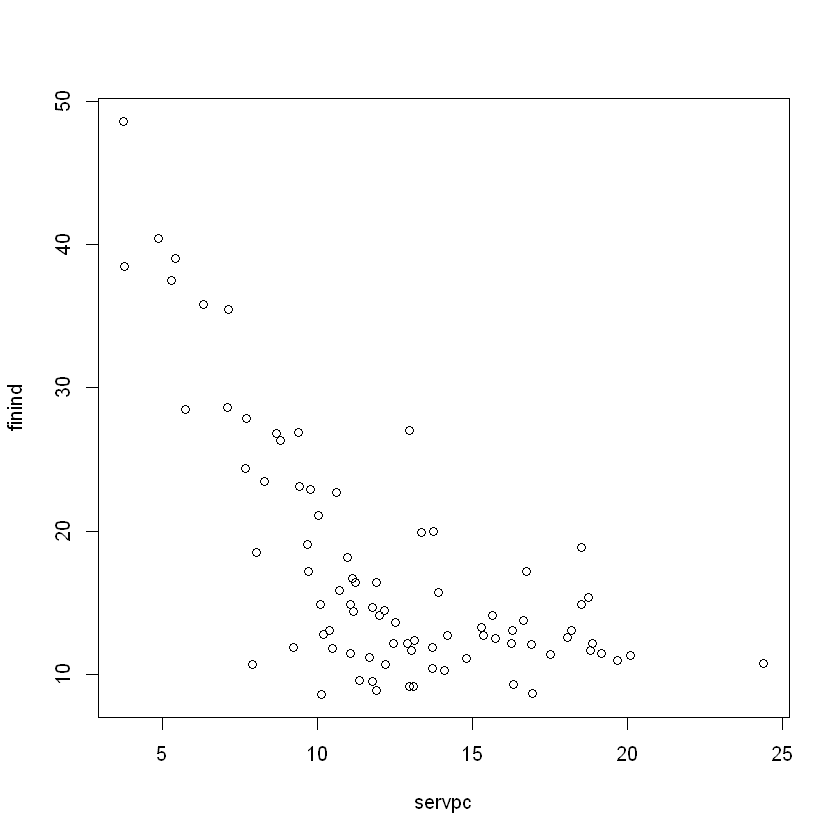

In [13]:
plot(finind~servpc, data=serv, subset=servpc<28)

### 3.1.3 교육수준과 임금

In [21]:
datadir = "http://econ.korea.ac.kr/~chirokhan/book/data"
klips = read.csv(file.path(datadir, 'klips11subset.csv'))

In [22]:
klips = subset(klips, regular==1 & married==1)
nrow(klips)

[1] 501

In [23]:
summary(klips)

      age             educ           tenure        regular      hours       
 Min.   :30.00   Min.   : 9.00   Min.   : 0.0   Min.   :1   Min.   :  9.00  
 1st Qu.:33.00   1st Qu.:12.00   1st Qu.: 2.0   1st Qu.:1   1st Qu.: 44.00  
 Median :35.00   Median :14.00   Median : 5.0   Median :1   Median : 50.00  
 Mean   :34.92   Mean   :14.43   Mean   : 5.8   Mean   :1   Mean   : 52.24  
 3rd Qu.:37.00   3rd Qu.:16.00   3rd Qu.: 8.0   3rd Qu.:1   3rd Qu.: 58.00  
 Max.   :39.00   Max.   :19.00   Max.   :19.0   Max.   :1   Max.   :200.00  
      earn           labinc         married 
 Min.   : 60.0   Min.   : 3.60   Min.   :1  
 1st Qu.:200.0   1st Qu.:24.00   1st Qu.:1  
 Median :250.0   Median :30.00   Median :1  
 Mean   :269.4   Mean   :31.84   Mean   :1  
 3rd Qu.:320.0   3rd Qu.:38.40   3rd Qu.:1  
 Max.   :770.0   Max.   :92.40   Max.   :1  

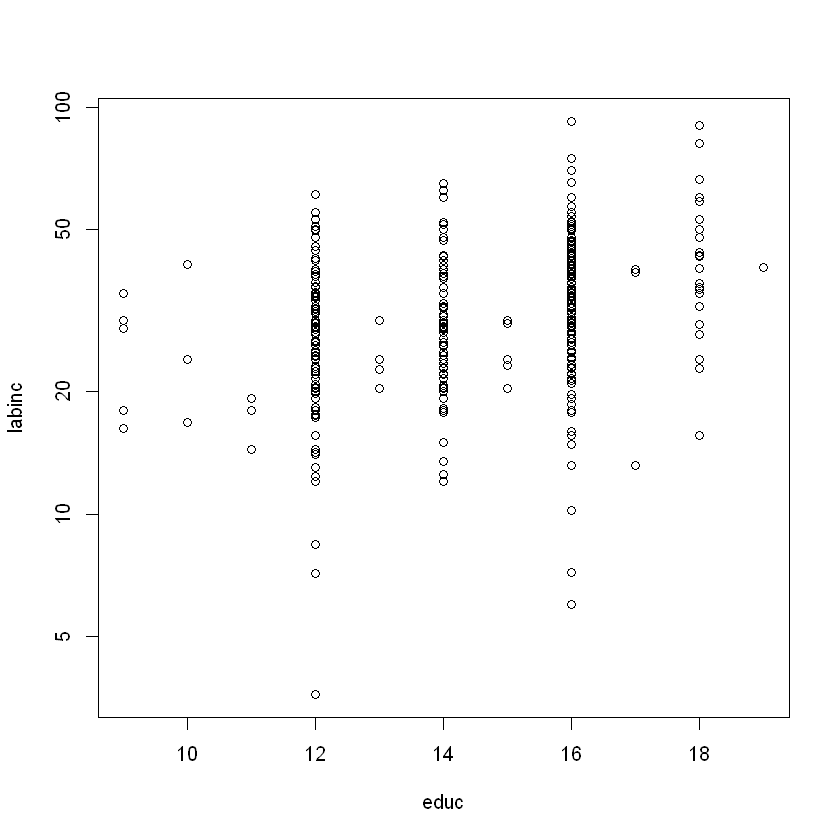

In [25]:
plot(labinc~educ, data=klips, log='y')

In [33]:
names(klips)

[1] "age"     "educ"    "tenure"  "regular" "hours"   "earn"    "labinc" 
[8] "married" "mloginc"

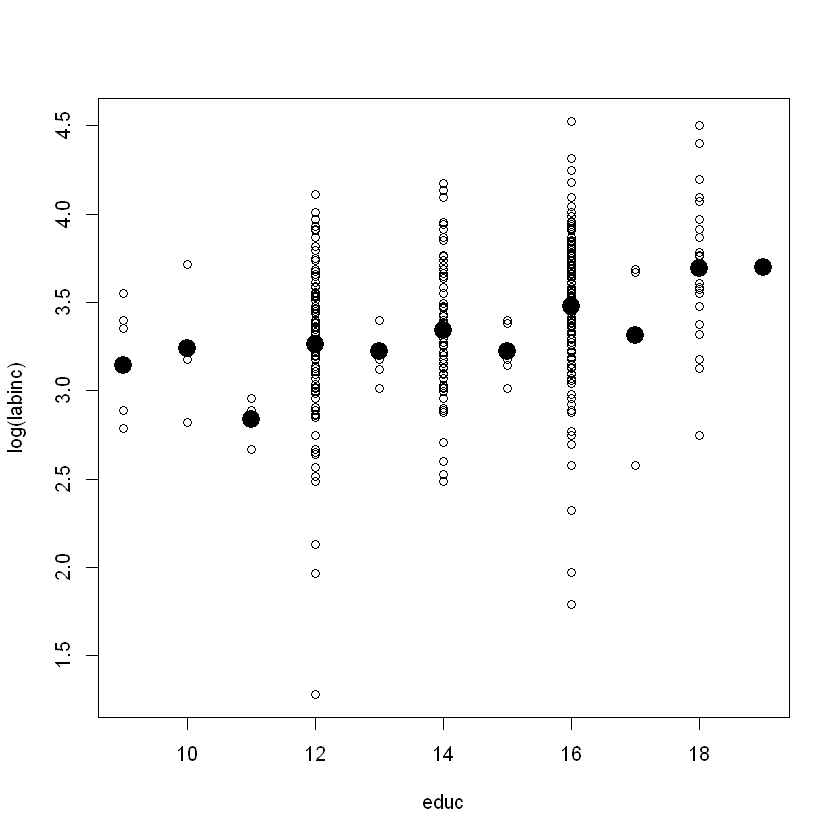

In [34]:
plot(log(labinc)~educ, data=klips)
klips$mloginc = with(klips, ave(log(labinc), educ, FUN=mean))
points(mloginc~educ, data=klips, pch=19, cex=2)

## 3.2 직선 그리기
이 점들에 가능한 가깝게 직선이 관통하도록 그릴 필요가 있음

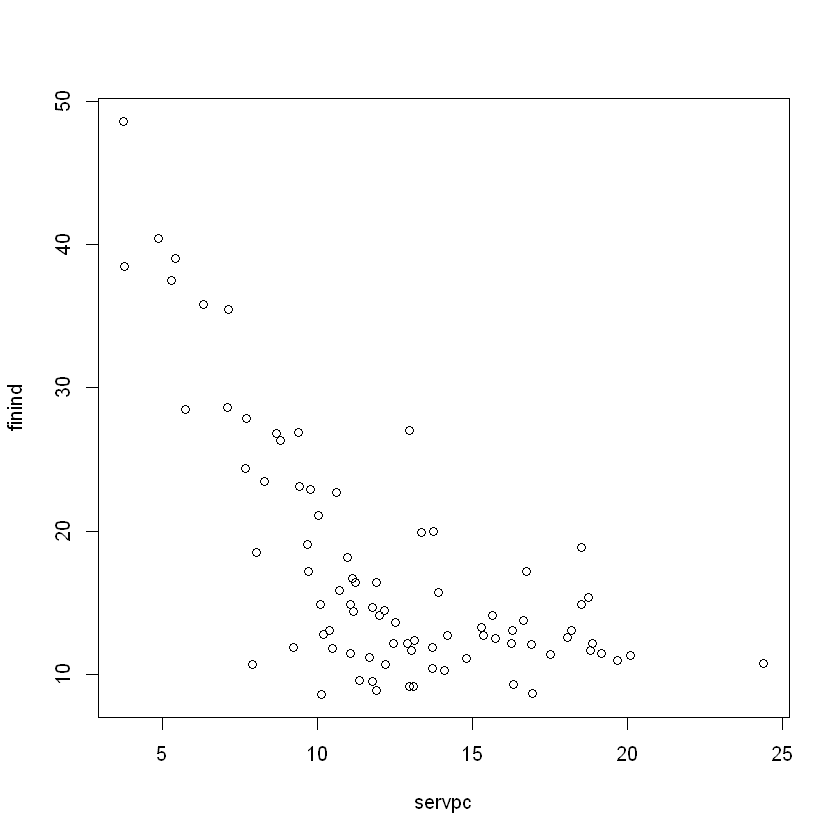

In [38]:
plot(finind~servpc, data=serv, subset=servpc<28)

## 3.3 최소제곱법

각 점들로부터 직선에 이르는 수직방향거리를 제곱하여 합한 값을 가장 작게 만들도록 절편과 기울기를 결정

보통최소제곱법(ordinary least squares, **OLS**)

In [39]:
# 최소제곱법과 최소절대편차법으로 직선 덧그리기
install.packages("quantreg")
library(quantreg)
datadir = "http://econ.korea.ac.kr/~chirokhan/book/data"
serv = read.csv(file.path(datadir, "serv.csv"))
serv1 = serv[serv$servpc<28,]

package 'quantreg' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\roh_kondae\AppData\Local\Temp\RtmpaQanrI\downloaded_packages


Loading required package: SparseM


Attaching package: 'SparseM'


The following object is masked from 'package:base':

    backsolve




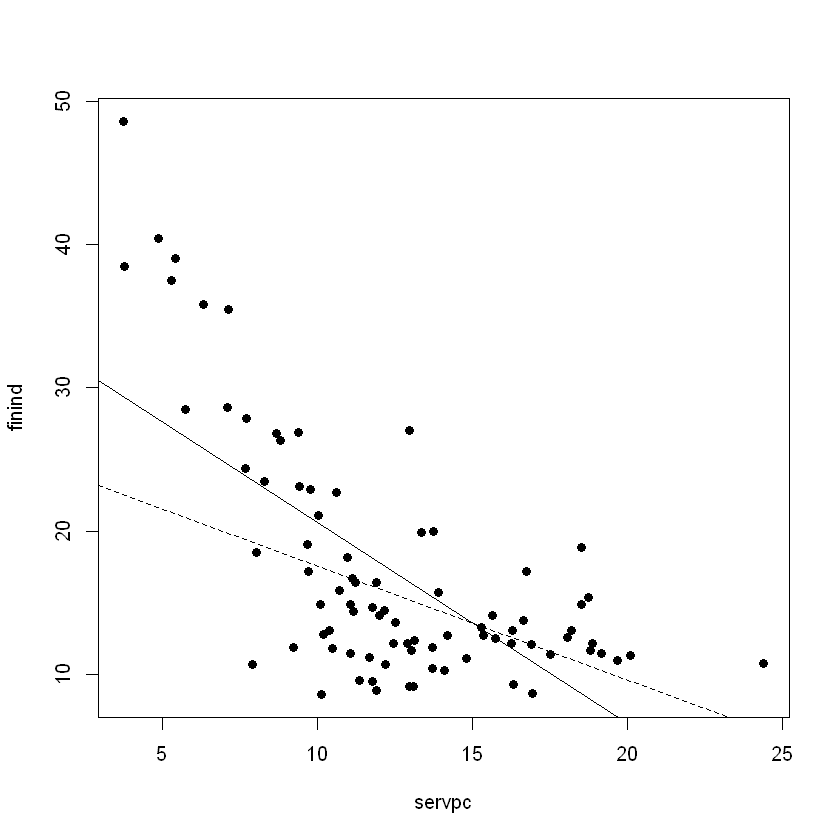

In [40]:
plot(finind~servpc, data=serv1,pch=19)
abline(lm(finind~servpc,data=serv1),lty=1)
abline(rq(finind~servpc,data=serv1),lty=2)

## 3.4 짧은 예제들
### 3.4.1 공무원 비율과 재정자립도

In [42]:
datadir = "http://econ.korea.ac.kr/~chirokhan/book/data"
serv = read.csv(file.path(datadir, "serv.csv"))
serv1 = serv[serv$servpc<28,]
nrow(serv1)

[1] 84

In [43]:
lm(log(finind)~log(servpc),data=serv1)


Call:
lm(formula = log(finind) ~ log(servpc), data = serv1)

Coefficients:
(Intercept)  log(servpc)  
     4.7675      -0.8212  


여타 요소가 동일할 때, 공무원 비율이 10% 높은 지역의 재정자립도가 약 8.2% 낮은 것으로 추정됨

In [44]:
x = log(serv1$servpc)
y = log(serv1$finind)
xd = x-mean(x)
b1 = sum(xd*y)/sum(xd^2)
b0 = mean(y) - b1*mean(x)
c(b0, b1)

[1]  4.7674536 -0.8212005

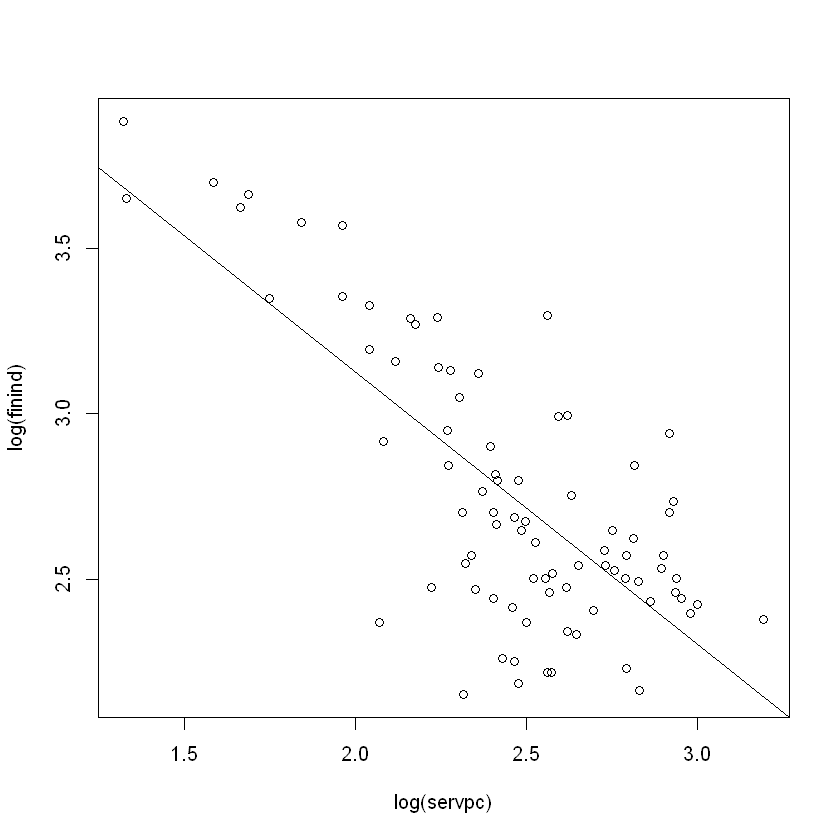

In [45]:
plot(log(finind)~log(servpc),data=serv1)
abline(lm(log(finind)~log(servpc),data=serv1))

### 3.4.2 교육수준과 연간 근로소득

In [48]:
datadir = "http://econ.korea.ac.kr/~chirokhan/book/data"
klips = read.csv(file.path(datadir, 'klips11subset.csv'))
ols = lm(log(labinc)~educ, data=klips)
ols


Call:
lm(formula = log(labinc) ~ educ, data = klips)

Coefficients:
(Intercept)         educ  
    2.33714      0.06769  


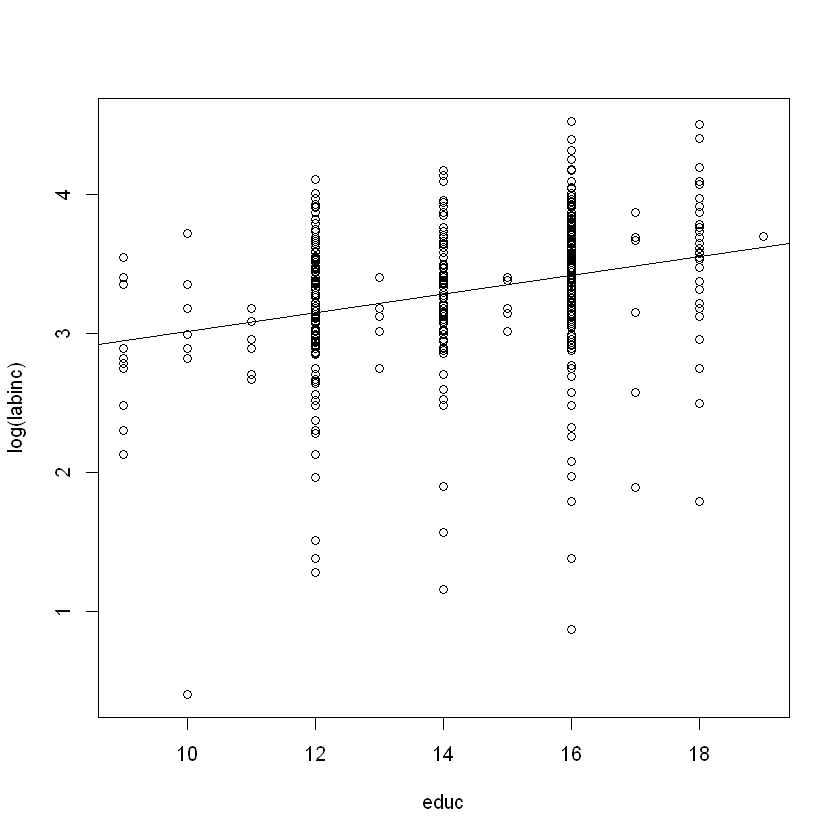

In [49]:
plot(log(labinc)~educ, data=klips)
abline(ols)

### 3.4.3 고령인구비율과 흡연율

In [50]:
datadir = "http://econ.korea.ac.kr/~chirokhan/book/data"
Death = read.csv(file.path(datadir, "deathrate.csv"))
reg = lm(smoke~aged, data=Death, subset=year==2010)
reg


Call:
lm(formula = smoke ~ aged, data = Death, subset = year == 2010)

Coefficients:
(Intercept)         aged  
    29.0774      -0.2286  


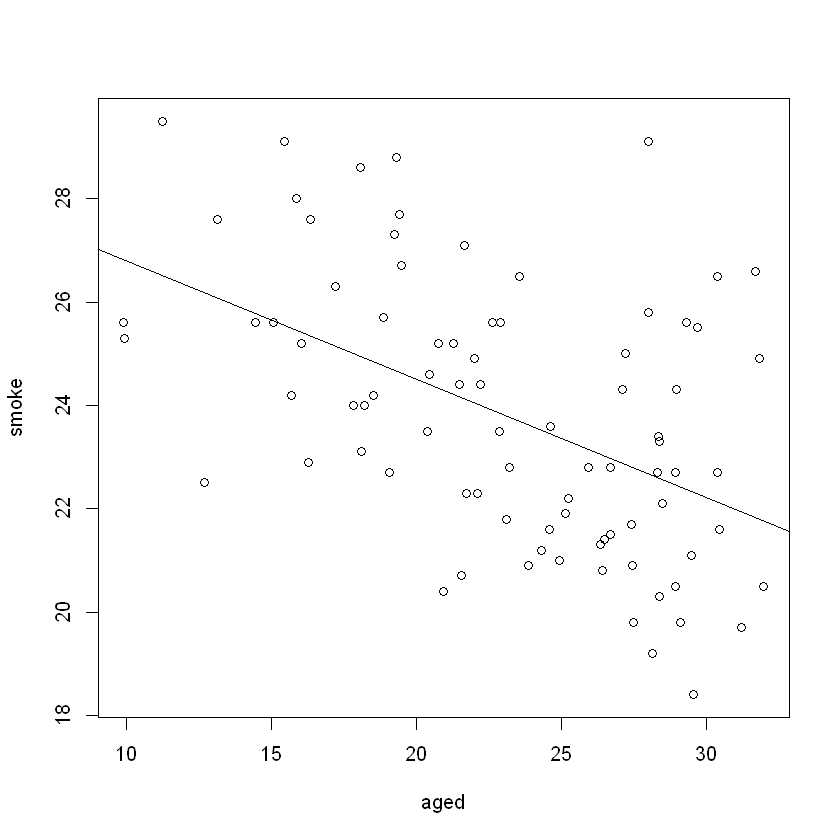

In [51]:
plot(smoke~aged, data=Death, subset=year==2010)
abline(reg)

**연습 3.6 deathrate.csv 파일의 2008년 자료를 이용해 smoke를 aged에 대해 최소제곱 회귀하고, 시각화하는 그림을 그려라**

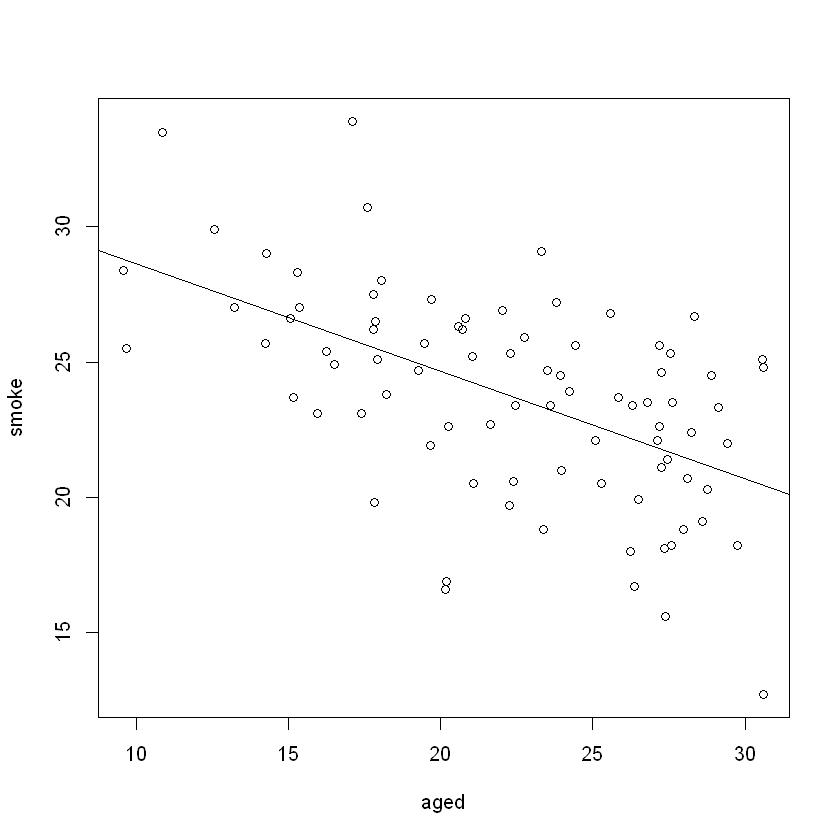

In [52]:
datadir = "http://econ.korea.ac.kr/~chirokhan/book/data"
Death = read.csv(file.path(datadir, "deathrate.csv"))
reg = lm(smoke~aged, data=Death, subset=year==2008)
plot(smoke~aged, data=Death, subset=year==2008)
abline(reg)

In [53]:
reg


Call:
lm(formula = smoke ~ aged, data = Death, subset = year == 2008)

Coefficients:
(Intercept)         aged  
    32.6118      -0.3972  


### 3.4.4 소비함수

In [56]:
data(Consumption, package="Ecdat")
colnames(Consumption)

[1] "yd" "ce"

In [57]:
lm(ce~yd, data=Consumption)


Call:
lm(formula = ce ~ yd, data = Consumption)

Coefficients:
(Intercept)           yd  
  6000.2561       0.8618  


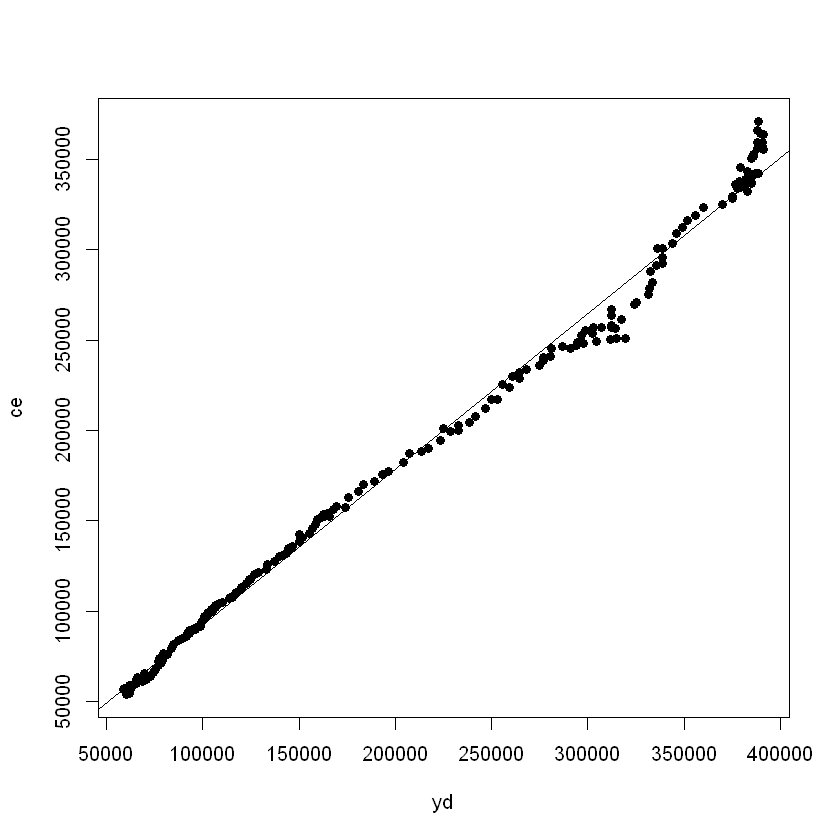

In [59]:
plot(ce~yd, data=Consumption,pch=19)
abline(lm(ce~yd, data=Consumption))

### 3.4.5 유전학과 골턴의 "회귀"

In [61]:
install.packages("HistData")

package 'HistData' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\roh_kondae\AppData\Local\Temp\RtmpaQanrI\downloaded_packages


In [62]:
datadir = "http://econ.korea.ac.kr/~chirokhan/book/data"
GaltonPar = read.csv(file.path(datadir, "galtonpar.csv"))

In [63]:
names(GaltonPar)

[1] "id"         "father"     "mother"     "midparht"   "numchild"  
 [6] "numson"     "numdtr"     "avgchildht" "avgsonht"   "avgdtrht"

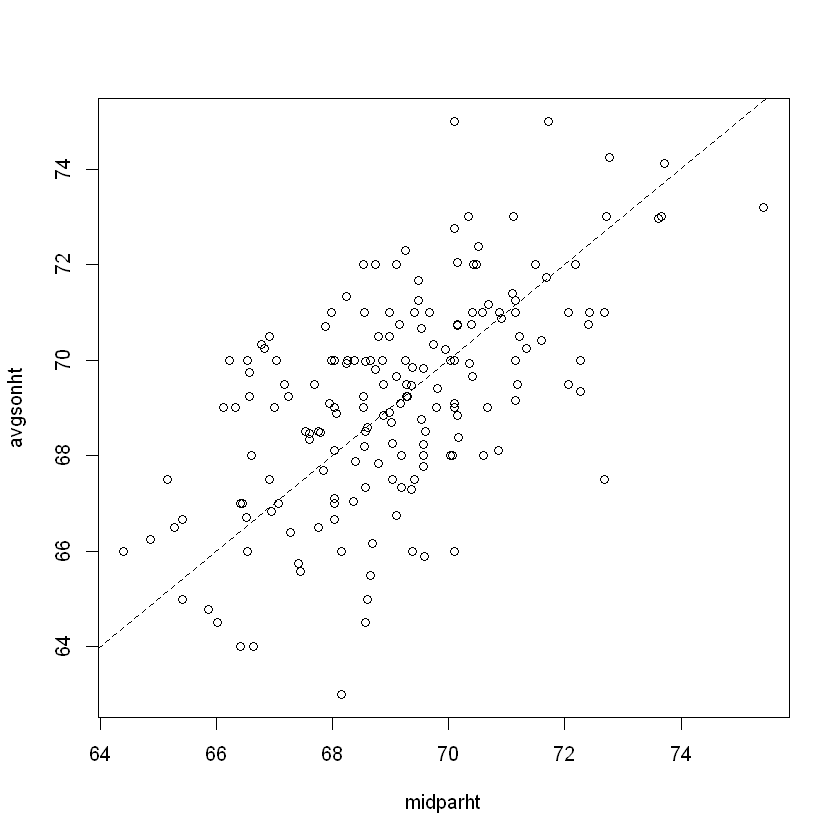

In [65]:
plot(avgsonht~midparht, data=GaltonPar)
abline(0,1,lty=2)

In [64]:
reg = lm(avgsonht~midparht, data=GaltonPar)
reg


Call:
lm(formula = avgsonht ~ midparht, data = GaltonPar)

Coefficients:
(Intercept)     midparht  
    21.7528       0.6871  


In [66]:
nobs(reg)

[1] 179


Call:
lm(formula = avgdtrht ~ midparht, data = GaltonPar)

Coefficients:
(Intercept)     midparht  
    19.6085       0.6424  


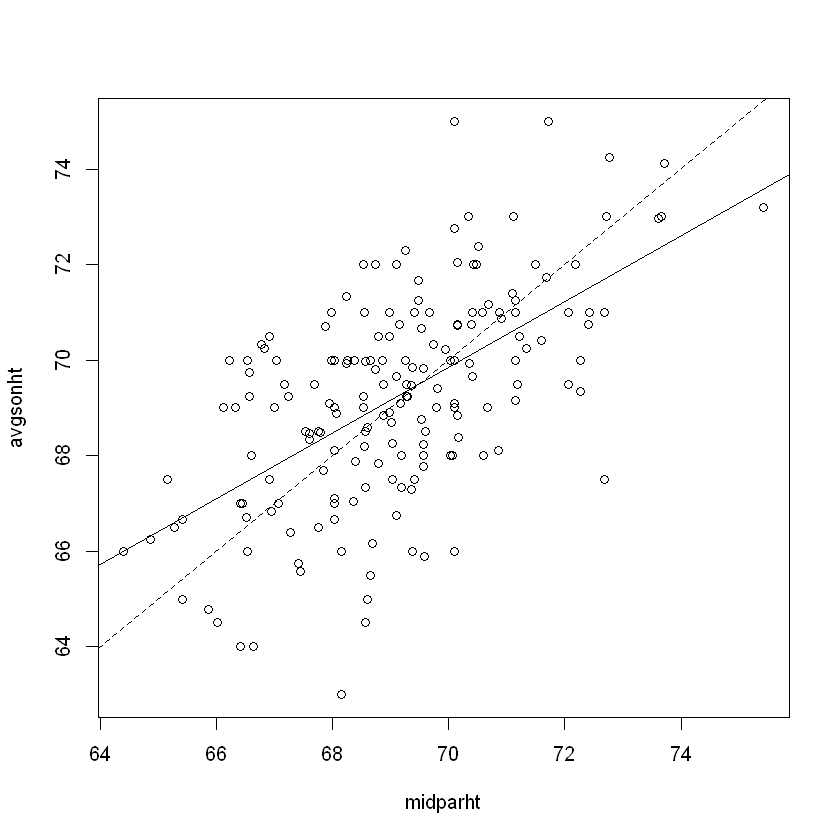

In [67]:
plot(avgsonht~midparht, data=GaltonPar)
abline(0,1,lty=2)
abline(reg)
lm(avgdtrht~midparht, data=GaltonPar)

### 3.4.6 우주의 나이

In [70]:
install.packages("gamair")
data(hubble,package="gamair")

package 'gamair' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\roh_kondae\AppData\Local\Temp\RtmpaQanrI\downloaded_packages


In [71]:
hubble[1:5,]

,Galaxy,y,x
,<fct>,<int>,<dbl>
1,NGC0300,133,2.00
2,NGC0925,664,9.16
3,NGC1326A,1794,16.14
4,NGC1365,1594,17.95
5,NGC1425,1473,21.88


**연습 3.7 NGC1365(4번 천체)는 우리로부터 얼마나 떨어져 있으며 1초에 얼마만큼 우리로부터 멀어져 가는가?**

1795만 메가 파아섹 떨어져 있으며, 초당 1594km씩 멀어지고 있음

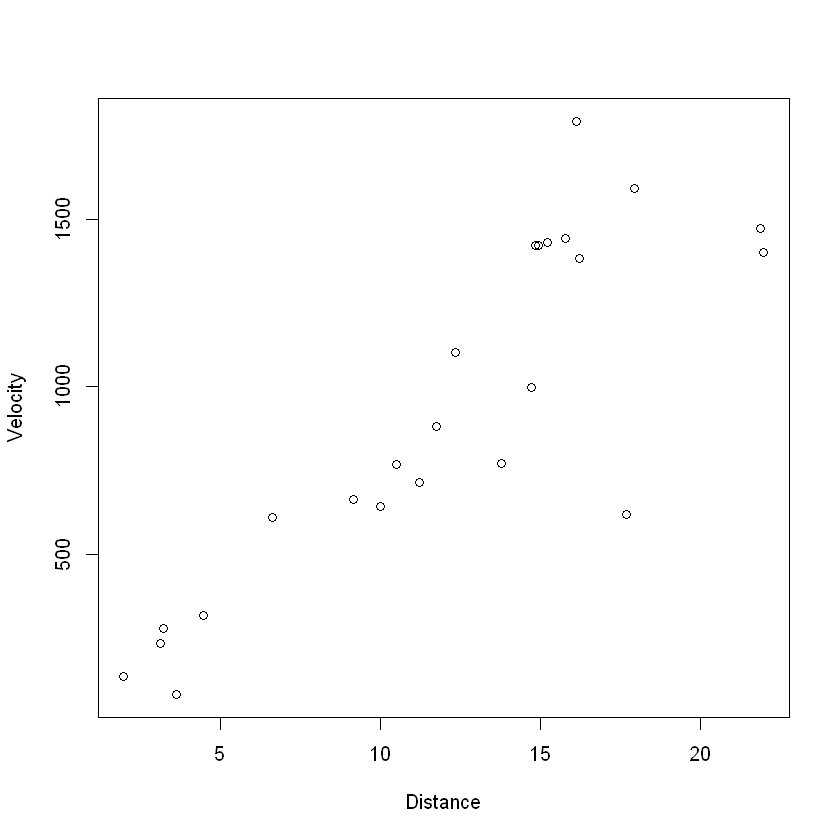

In [72]:
plot(y~x, data=hubble, xlab="Distance", ylab="Velocity")

In [73]:
install.packages("ggplot2")

also installing the dependencies 'colorspace', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'gtable', 'isoband', 'scales'





  There is a binary version available but the source version is later:
        binary source needs_compilation
isoband  0.2.0  0.2.1              TRUE

package 'colorspace' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'viridisLite' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\roh_kondae\AppData\Local\Temp\RtmpaQanrI\downloaded_packages


installing the source package 'isoband'


Warning message in install.packages("ggplot2"):
"installation of package 'isoband' had non-zero exit status"


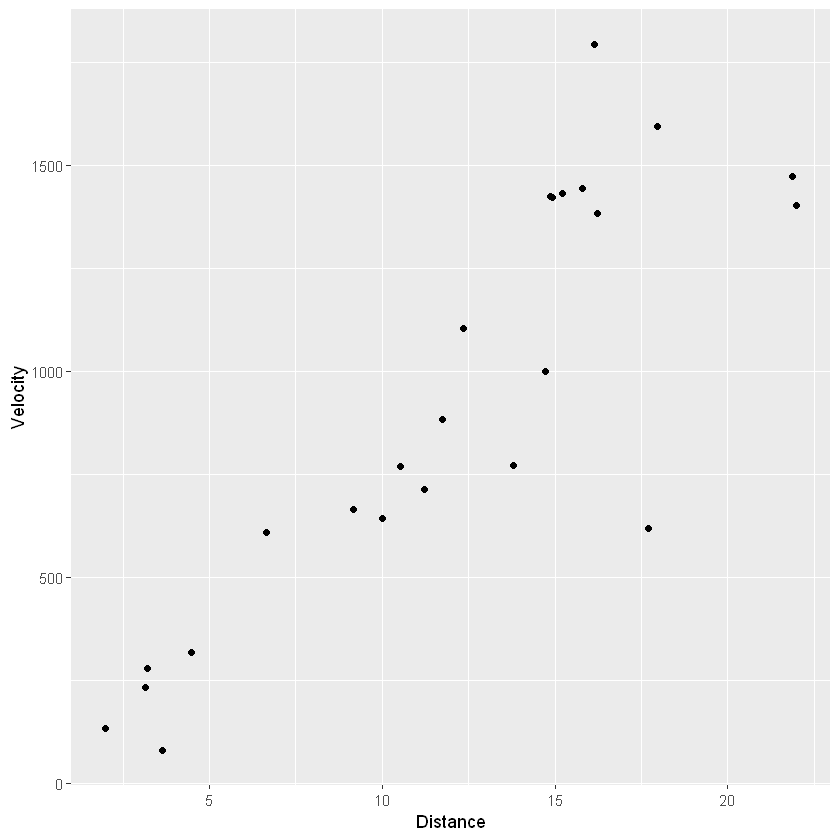

In [74]:
library(ggplot2)
qplot(x, y, data=hubble, xlab="Distance", ylab="Velocity")

In [76]:
ols = lm(y~x-1, data=hubble)
ols


Call:
lm(formula = y ~ x - 1, data = hubble)

Coefficients:
    x  
76.58  


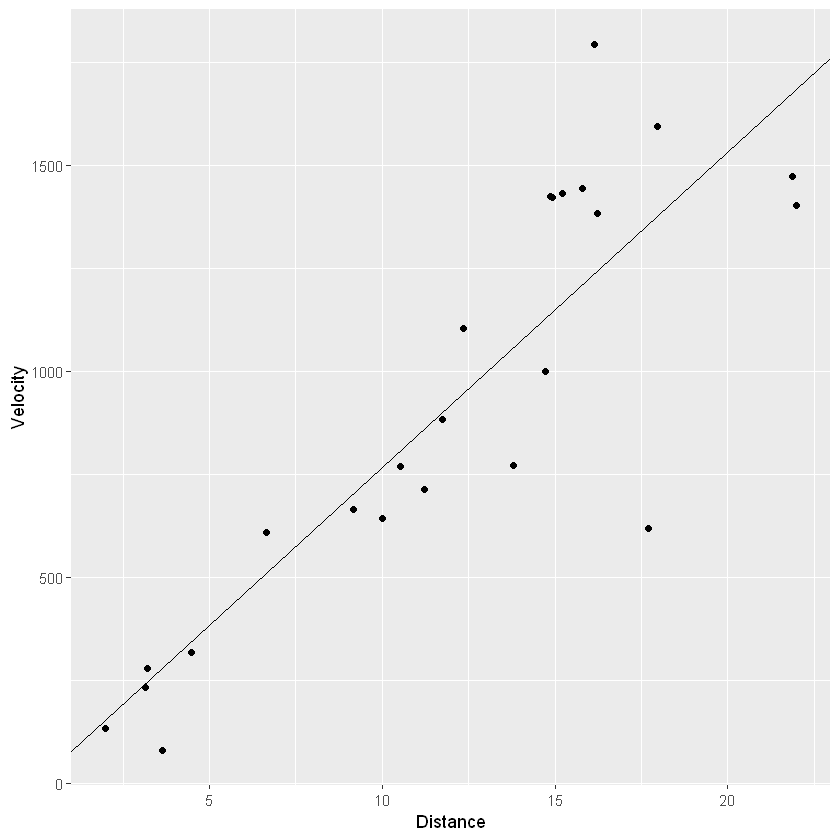

In [79]:
p = qplot(x,y, data=hubble, xlab="Distance", ylab="Velocity")
p + geom_abline(intercept=0, slope=ols$coef[1])